# PCA ANALYSIS

In [2]:
# basics
import os, sys

# arrays
import numpy as np
import pandas as pd
import xarray as xr

# plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# data viewer
from sscode.data import Loader, load_moana_hindcast_ss
from sscode.pca import PCA_DynamicPred
from sscode.plotting.utils import plot_ccrs_nz

# warnings
import warnings
warnings.filterwarnings('ignore')


 loading the sea-level-pressure fields... 


 loading daily resampled data... 


 loading the Moana v2 hindcast data... 


 loading and plotting the UHSLC tidal guages... 



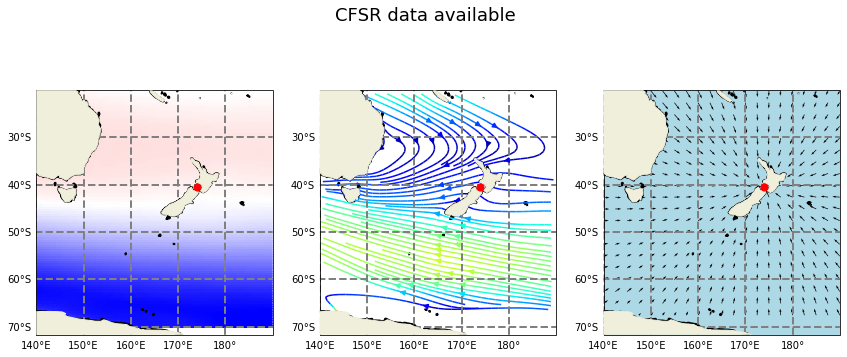

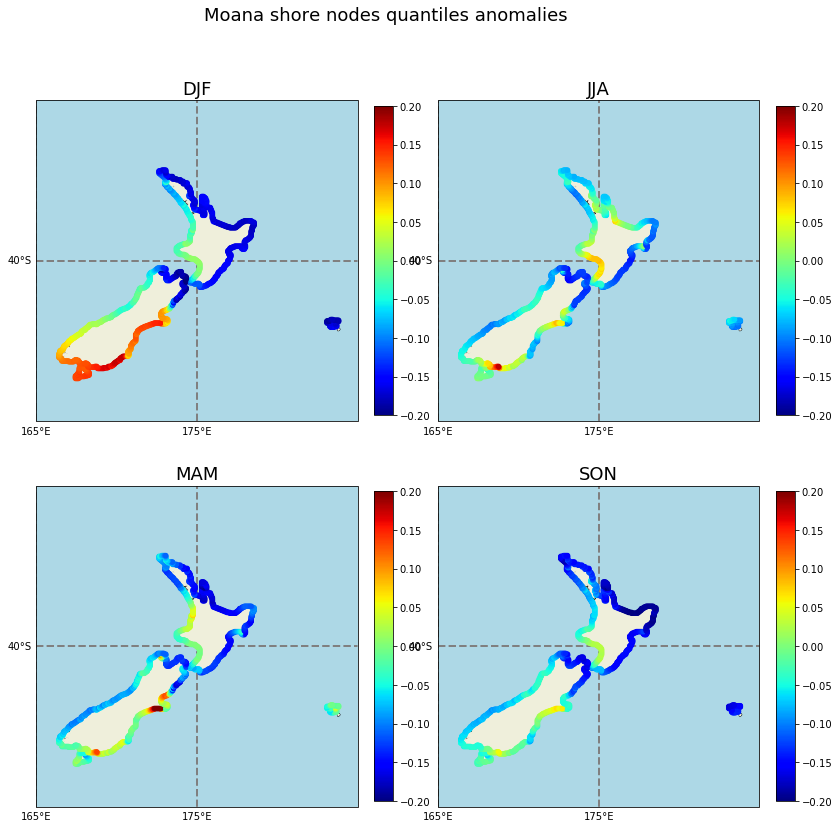

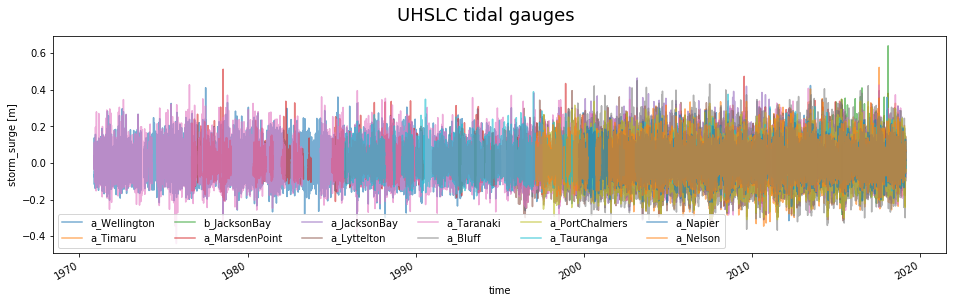

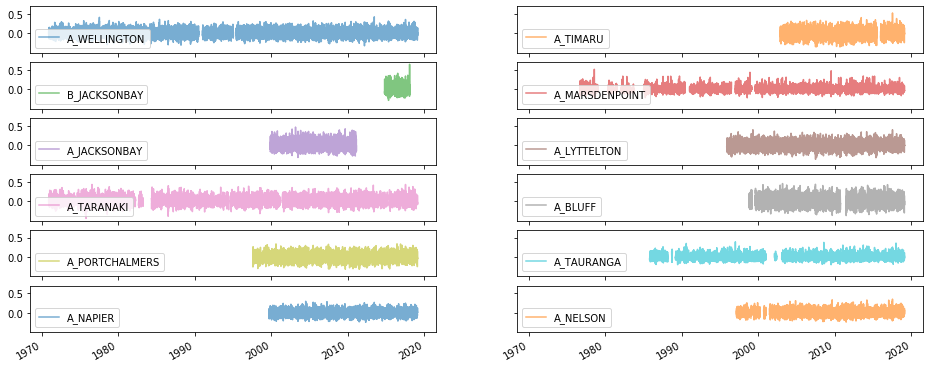

In [3]:
# load the data
load_cfsr_moana_uhslc = Loader(
    data_to_load=['cfsr','moana','uhslc']
)

In [4]:
load_cfsr_moana_uhslc.location

(173.9, -40.5)


 plotting 5 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



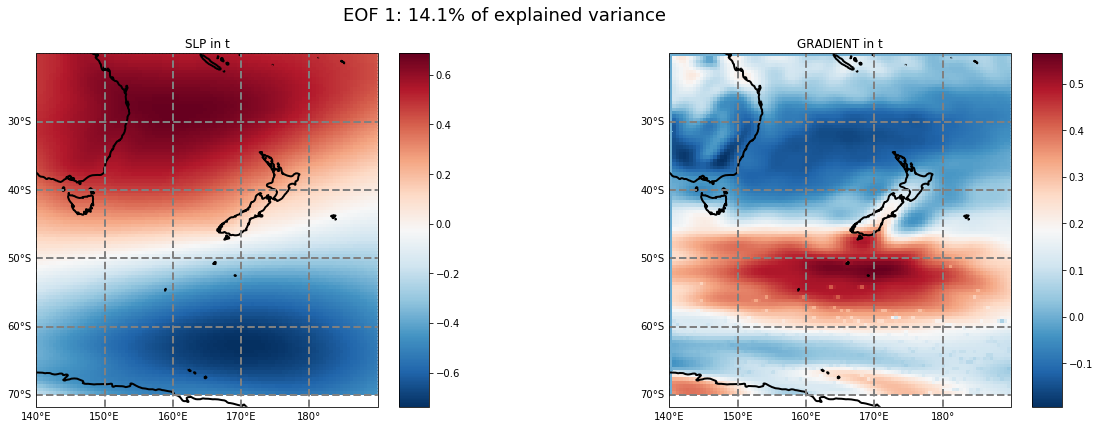

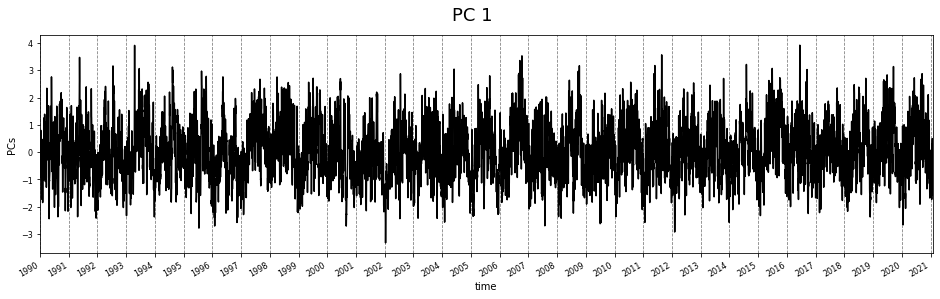

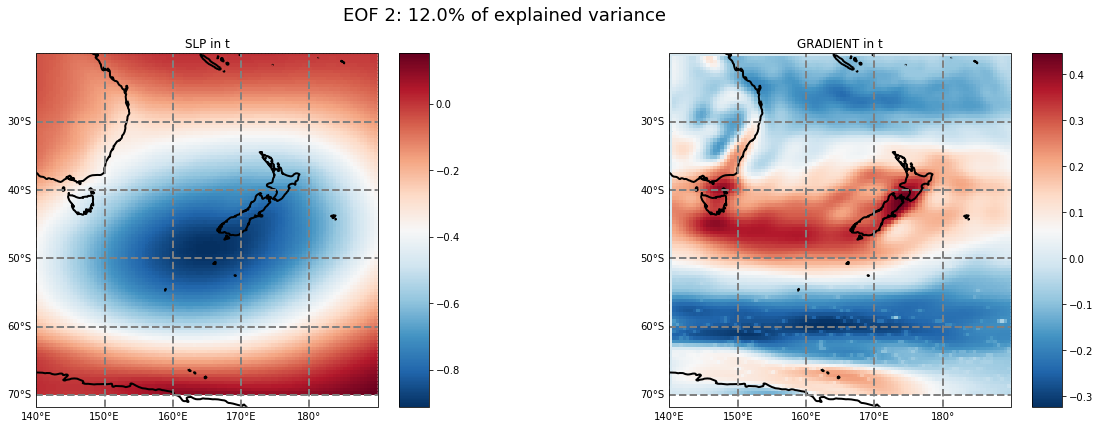

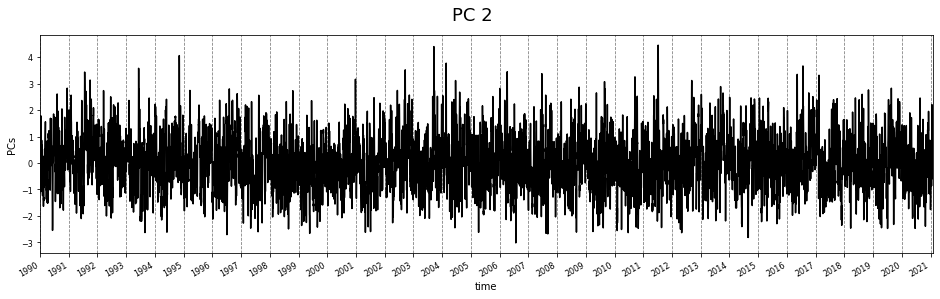

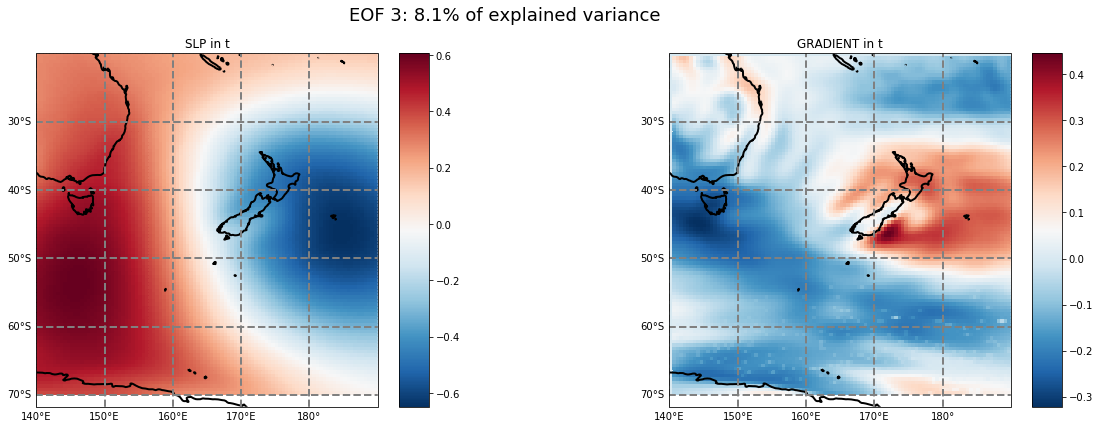

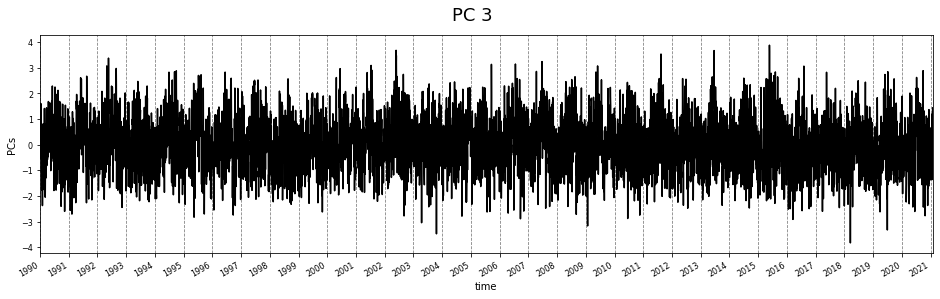

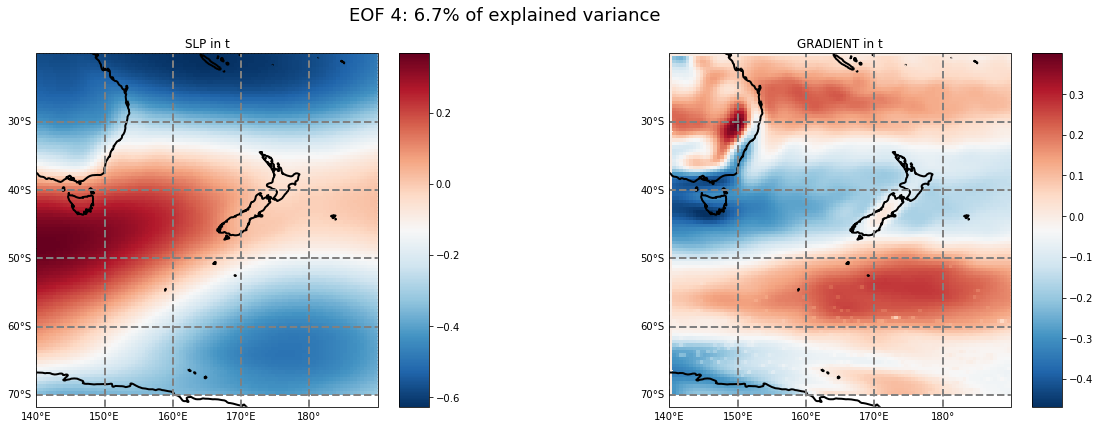

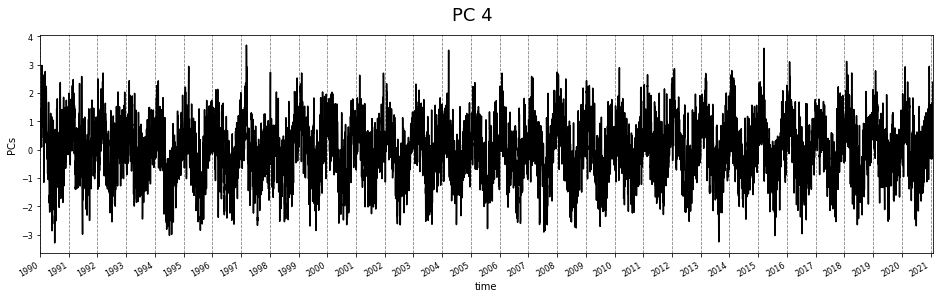

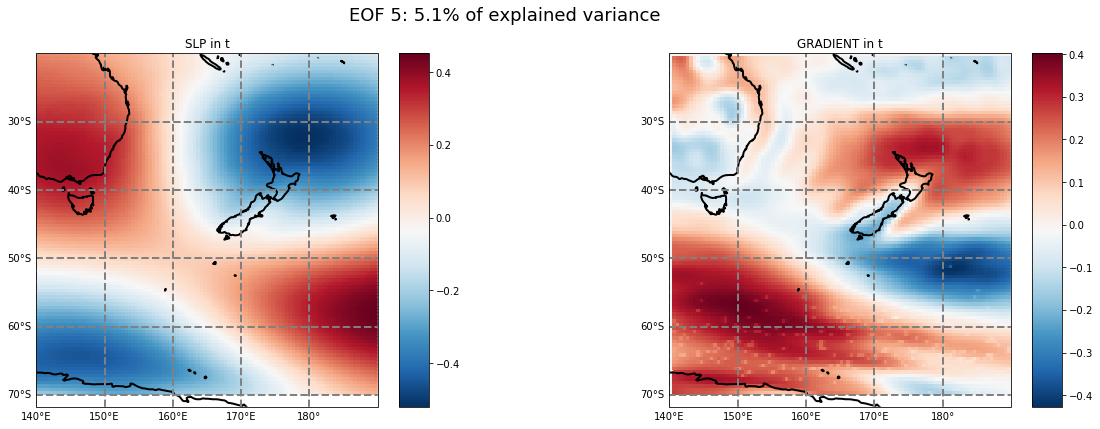

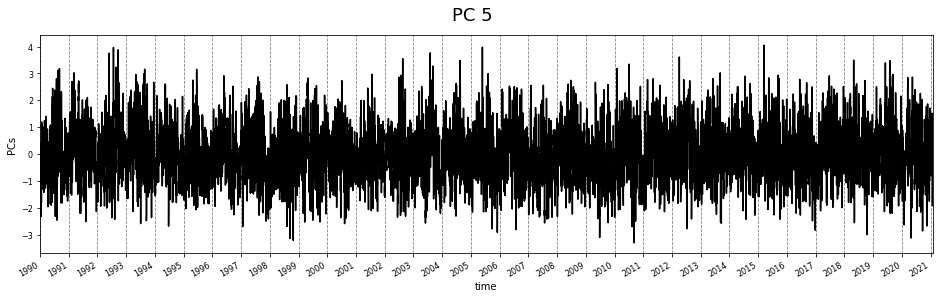

In [5]:
# load / calculate the pcs
if os.path.isfile('../data/cfsr/cfsr_regional_daily_pcs.nc'):
    pcs_cfsr = xr.open_dataset(
        '../data/cfsr/cfsr_regional_daily_pcs.nc'
    )
    from sscode.plotting.pca import plot_pcs
    plot_pcs(pcs_cfsr,n_plot=5)


 lets calculate the PCs... 


 calculating the gradient of the sea-level-pressure fields... 


 pressure/gradient predictor both with shape: 
 (11354, 9, 9) 


 calculated PCs matrix with shape: 
 (11352, 324) 


 plotting 2 components with 4 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



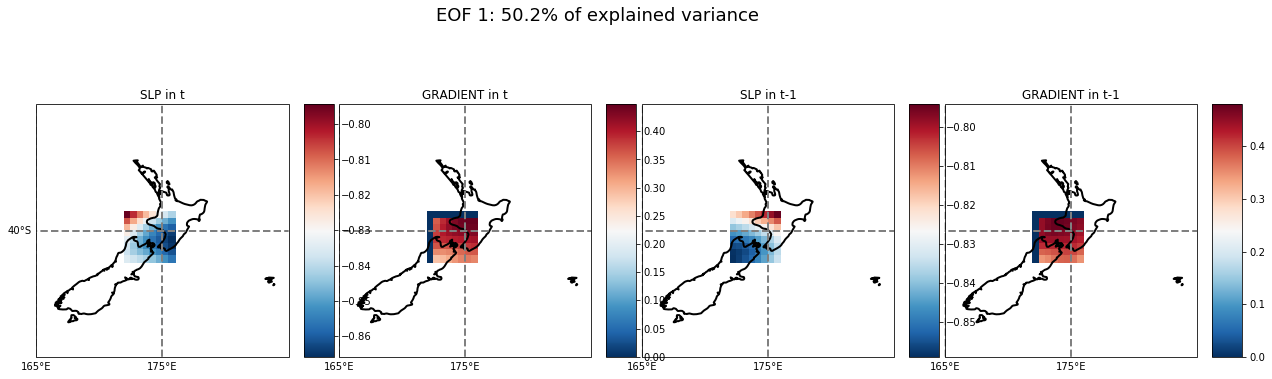

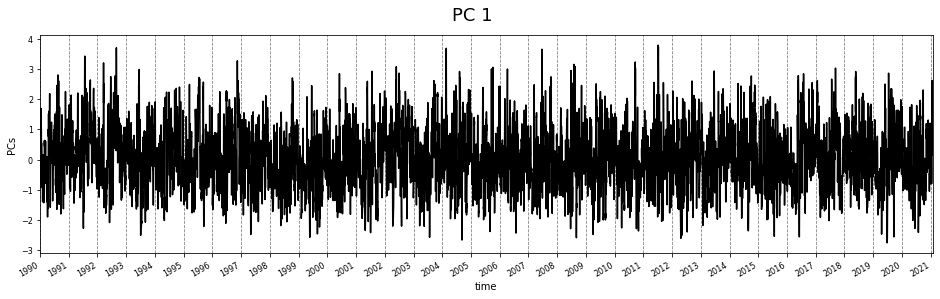

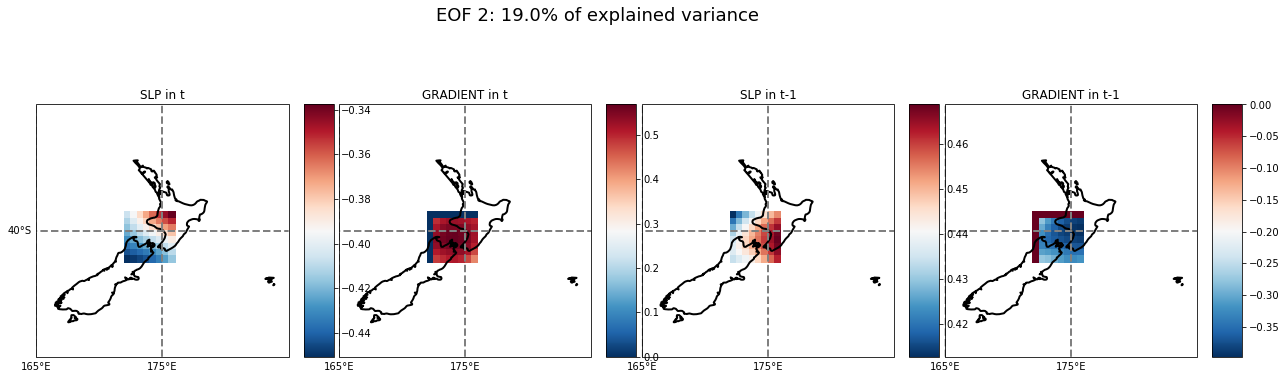

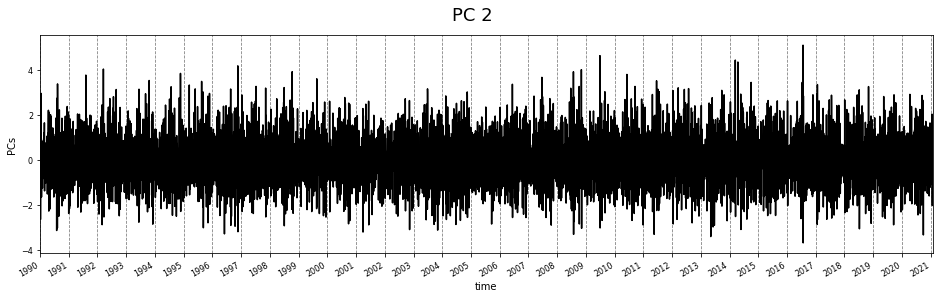

(<xarray.Dataset>
 Dimensions:   (n_components: 324, n_features: 324, n_lat: 9, n_lon: 9, time: 11352)
 Coordinates:
   * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2021-01-29
 Dimensions without coordinates: n_components, n_features, n_lat, n_lon
 Data variables:
     PCs       (time, n_components) float64 -10.34 2.599 ... -1.609e-20
     EOFs      (n_components, n_features) float64 -0.06951 -0.0703 ... 0.0 0.0
     variance  (n_components) float64 130.6 49.5 34.48 ... 8.886e-38 1.35e-38
     pcs_lon   (n_lon) float32 172.0 172.5 173.0 173.5 ... 175.0 175.5 176.0
     pcs_lat   (n_lat) float32 -38.5 -39.0 -39.5 -40.0 ... -41.5 -42.0 -42.5,
 StandardScaler())

In [6]:
# calculate the local pcs
PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp, 
    calculate_gradient=True, time_lapse=2,
    region=(True,(
        load_cfsr_moana_uhslc.location[0]-2.1,
        load_cfsr_moana_uhslc.location[0]+2.1,
        load_cfsr_moana_uhslc.location[1]+2.1,
        load_cfsr_moana_uhslc.location[1]-2.1
    )),
    pca_plot=True
)